# Machine Learning I (CC2008) - 2023/2024

Work developed by Francisco Carqueija (202205113), Marta Longo (202207985) and Sara Táboas (202205101). 

## Table of contents

<!-- Hello World -->
1. [Introduction](#Random-Forest-improvement-for-binary-classification)
2. [Libraries Needed](#Libraries)
3. [Random Forest - Standard Version](#Random-Forest---Standard-Version)
4. [Random Forest - Weighted Version](#Random-Forest---Weighted-Version)
5. [Test Algorithms and Performance Report](#Test-Algorithms-and-Performance-Report)
6. [Datasets Analysis](#Datasets-Analysis)

    - [Dataset 1](#Dataset-1) 

    - [Dataset 2](#Dataset-2) 

    - [Dataset 3](#Dataset-3) 

    - [Dataset 4](#Dataset-4) 

    - [Dataset 5](#Dataset-5) 

    - [Dataset 6](#Dataset-6) 

    - [Dataset 7](#Dataset-7) 

    - [Dataset 8](#Dataset-8) 

    - [Dataset 9](#Dataset-9) 
    
    - [Dataset 10](#Dataset-10)

7. [Results Analysis and Comparison ](#Results-Analysis-and-Comparison)



----------------------------------------------------------------------------------------------------------------------------------

## Random Forest improvement for binary classification

**Random Forest** is a machine learning algorithm that combines the output of multiple decision trees to reach a single result, used both in classification and regression. However, when it performs on imbalaced datasets, where one class significantly outnumbers the others, Random Forests can encounter challenges.

In the context of imbalanced datasets, Random Forests may exhibit a bias towards the majority class. This bias occurs because decision trees inherently favor the dominant class due to their tendency to split based on the most common class at each node. As a result, the minority class may be overshadowed, leading to poor predictive performance, particularly for the minority class.

To mitigate the impact of class imbalance on Random Forest, we are presenting a different implementation of the algorithm, where the class weights are taken into account in the splitting criterion. 

In this notebook, we analyse the behaviour of both Random Forest implementations over 10 different imbalanced datasets and compare all the results obtained. 

----------------------------------------------------------------------------------------------------------------------------------

## Libraries
[[ go back to the top ]](#Table-of-contents)

In [1]:
# Random Forest 
import numpy as np
from scipy import stats
import random

# Datasets Analysis - Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from statistics import mean
import pandas as pd

# Train-test split
from sklearn.model_selection import train_test_split

# Calculate class weights
from collections import Counter

# Plots
from matplotlib import pyplot as plt

----------------------------------------------------------------------------------------------------------------------------------

## Random Forest - Standard Version
[[ go back to the top ]](#Table-of-contents)

In [2]:
from rf_standard import RandomForestClassifierM

## Random Forest - Weighted Version
[[ go back to the top ]](#Table-of-contents)

In [3]:
from rf_weighted import WeightedRandomForestClassifier

----------------------------------------------------------------------------------------------------------------------------------

## Test Algorithms and Performance Report
[[ go back to the top ]](#Table-of-contents)

In [4]:
def test_algorithm(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Metrics 
    ac = accuracy_score(y_test, y_pred)
    balanced_ac = balanced_accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    #Plot the Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print('Accuracy score = ', ac)
    print('Balanced Accuracy Score = ', balanced_ac)

    return ac,balanced_ac
    

In [5]:
accuracy_score_list = []
balanced_accuracy_score_list = [] 

weighted_accuracy_score_list = []
weighted_balanced_accuracy_score_list = []

----------------------------------------------------------------------------------------------------------------------------------

## Datasets Analysis

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 1
[[ go back to the top ]](#Table-of-contents)

In [6]:
ds1 = pd.read_csv('data/ds1.csv')
ds1['Class'] = ds1['Class'].replace({'N': 0, 'P': 1})
ds1.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/3986133255.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds1['Class'] = ds1['Class'].replace({'N': 0, 'P': 1})


,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,Class
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,1
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,1
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,1
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,1
4,6.0,3.0,18.0,0.500,0.500,0.944,2.25,9.0,17.0,4.0,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/3677742500.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds1['Class'], sort=True).sort_index()


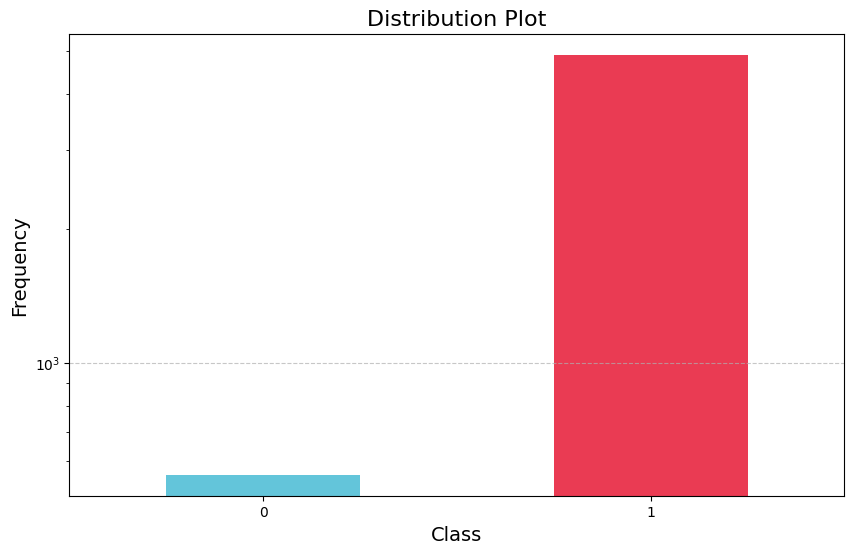

In [7]:
count_classes = pd.value_counts(ds1['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53']) 
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


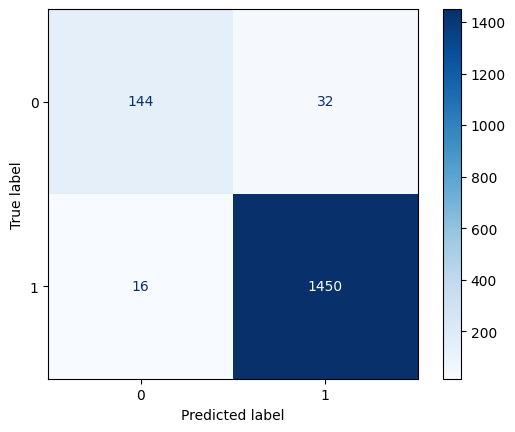

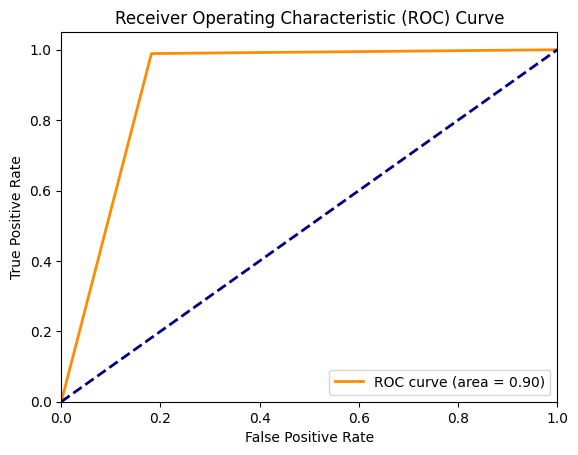

Accuracy score =  0.9707673568818515
Balanced Accuracy Score =  0.903633883170036
Weighted Random Forest Results:


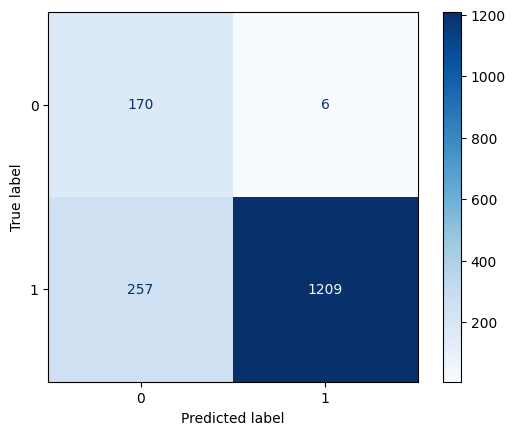

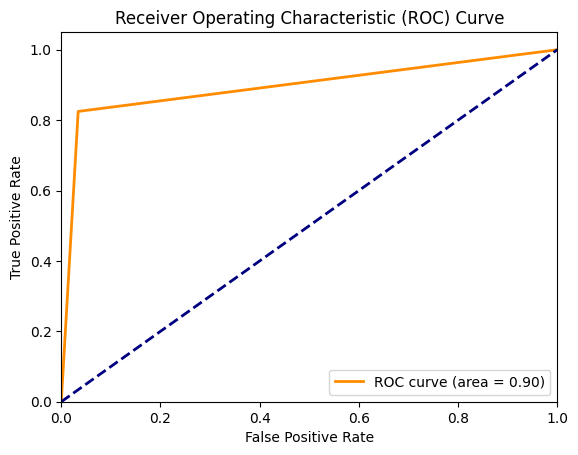

Accuracy score =  0.8398294762484775
Balanced Accuracy Score =  0.8953010666005209


In [8]:
X=ds1.iloc[:,1:-1].values
y=ds1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 2
[[ go back to the top ]](#Table-of-contents)

In [9]:
ds2 = pd.read_csv('data/ds2.csv')
ds2['Class'] = ds2['Class'].replace({False: 1, True: 0})
ds2.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/3798690828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds2['Class'] = ds2['Class'].replace({False: 1, True: 0})


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Class
0,2,1.0,0,0,0,0.0,1.0,0.10,0.0,0.00,...,2.0,0.08,28.0,29.0,9.0,5,13.0,0.00,10.0,1
1,1,1.0,4,0,0,0.0,1.0,0.07,0.0,0.00,...,6.0,0.06,52.0,55.0,26.0,14,16.0,0.00,14.0,1
2,27,19.0,1,4,13,26.0,11.0,0.26,12.0,2.17,...,25.0,0.13,58.0,78.0,30.0,24,83.0,30.91,42.0,1
3,2,17.0,2,0,0,24.0,9.0,0.47,8.0,3.00,...,25.0,0.41,73.0,81.0,23.0,20,22.0,0.00,19.0,1
4,6,1.0,1,0,2,0.0,1.0,0.11,0.0,0.00,...,3.0,0.06,19.0,23.0,15.0,7,18.0,18.18,9.0,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/1224078451.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds2['Class'], sort=True).sort_index()


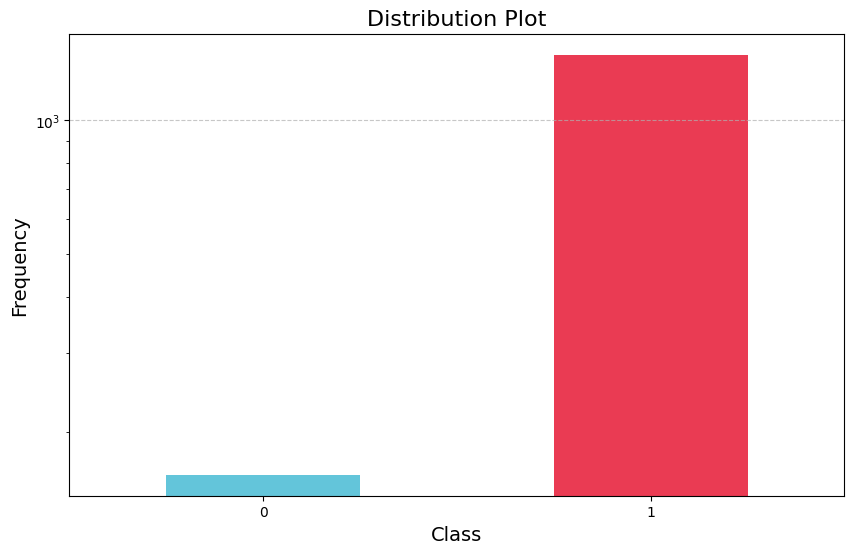

In [10]:
count_classes = pd.value_counts(ds2['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  # Different colors for the bars
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Standard Random Forest Results:


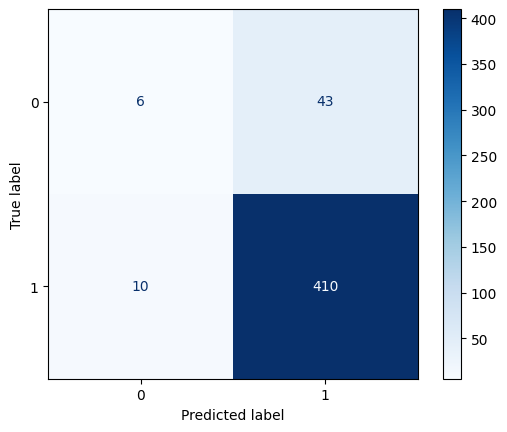

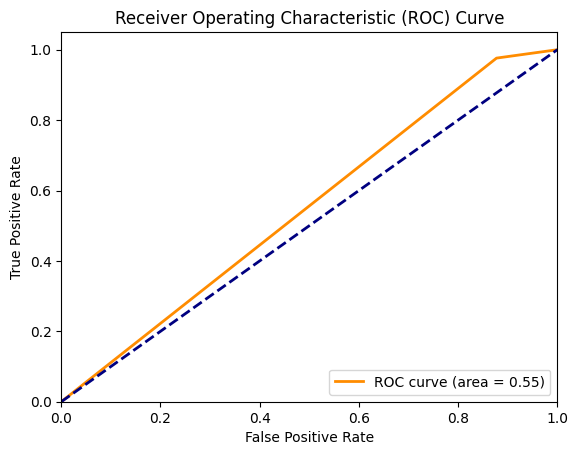

Accuracy score =  0.8869936034115139
Balanced Accuracy Score =  0.5493197278911565
Weighted Random Forest Results:


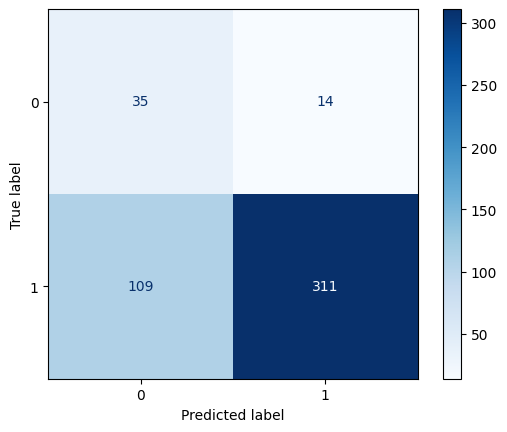

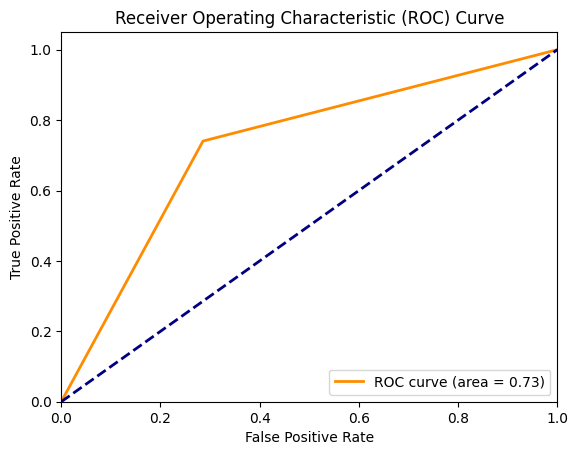

Accuracy score =  0.7377398720682303
Balanced Accuracy Score =  0.7273809523809525


In [11]:
X=ds2.iloc[:,1:-1].values
y=ds2.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 3
[[ go back to the top ]](#Table-of-contents)

In [12]:
ds3 = pd.read_csv('data/ds3.csv')
ds3['Class'] = ds3['Class'].replace({1: 0, 2: 1})
ds3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Class
0,1,1,502.0,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,249.0,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,202.0,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,56.0,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,278.0,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/770801036.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds3['Class'], sort=True).sort_index()


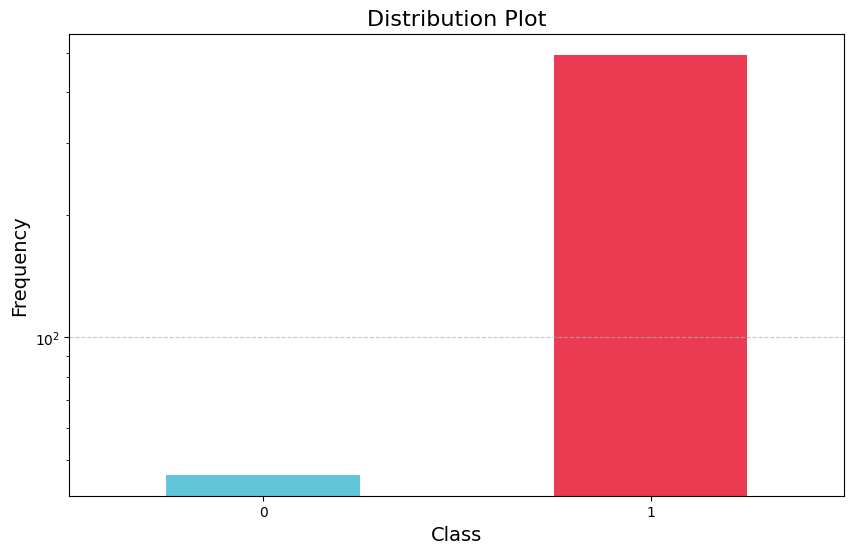

In [13]:
count_classes = pd.value_counts(ds3['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


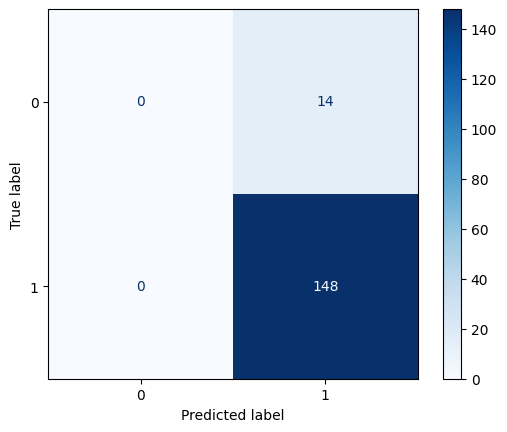

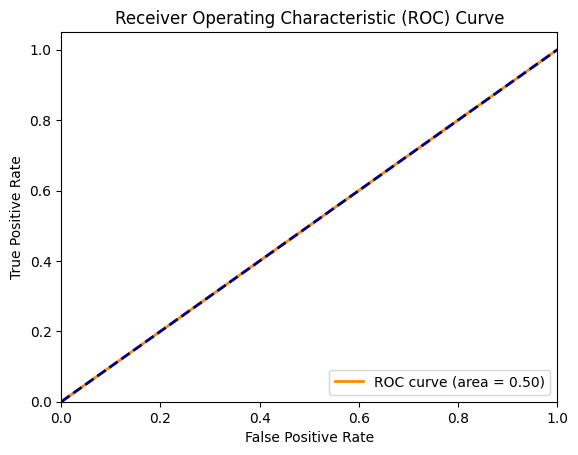

Accuracy score =  0.9135802469135802
Balanced Accuracy Score =  0.5
Weighted Random Forest Results:


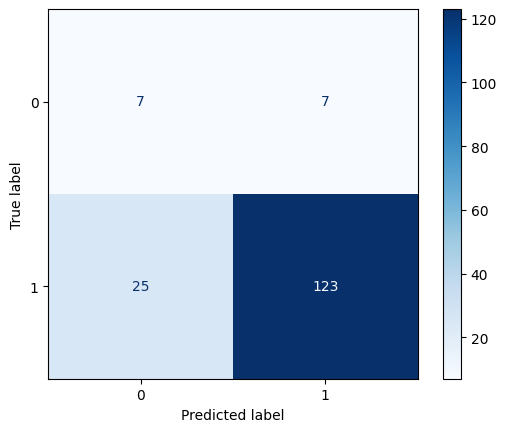

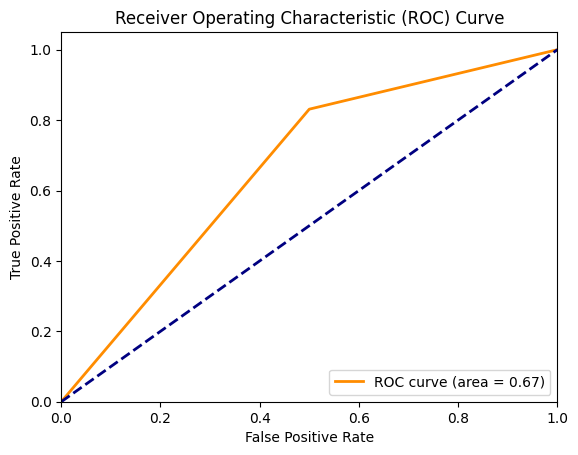

Accuracy score =  0.8024691358024691
Balanced Accuracy Score =  0.6655405405405406


In [14]:
X=ds3.iloc[:,1:-1].values
y=ds3.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 4
[[ go back to the top ]](#Table-of-contents)

In [15]:
ds4 = pd.read_csv('data/modified.csv')
ds4['Class'] = ds4['Class'].replace({'tested_positive': 0, 'tested_negative': 1})
ds4.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/1986798049.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds4['Class'] = ds4['Class'].replace({'tested_positive': 0, 'tested_negative': 1})


,preg,plas,pres,skin,insu,mass,pedi,age,Class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/2023302814.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds4['Class'], sort=True).sort_index()


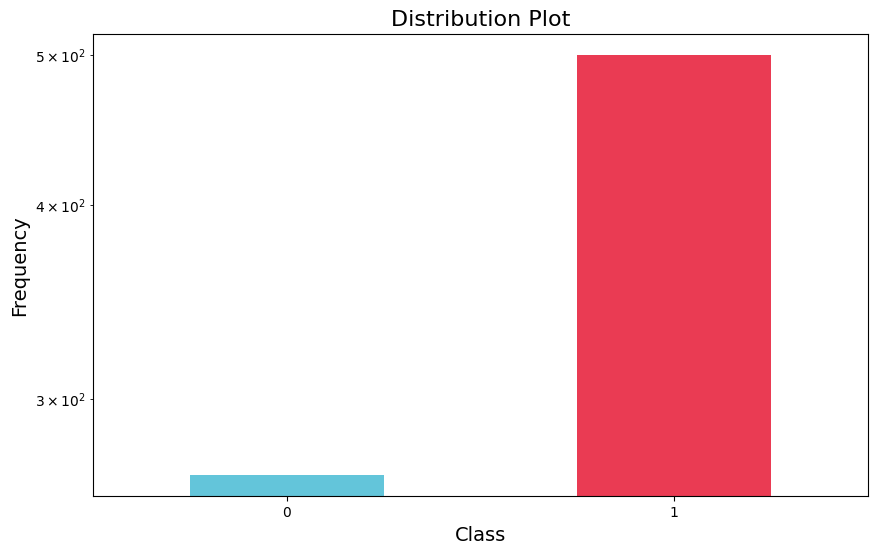

In [16]:
count_classes = pd.value_counts(ds4['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


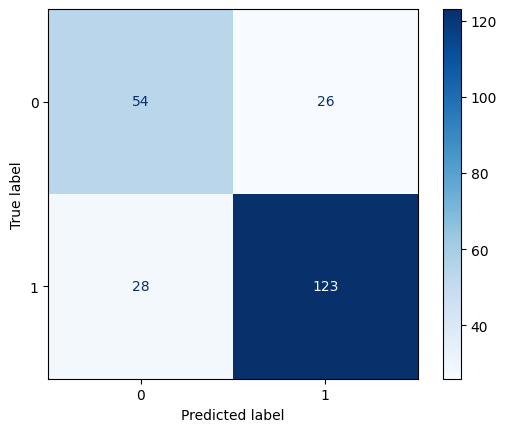

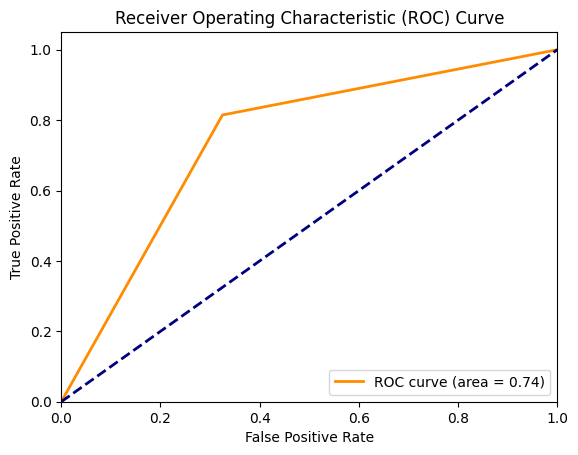

Accuracy score =  0.7662337662337663
Balanced Accuracy Score =  0.7447847682119206
Weighted Random Forest Results:


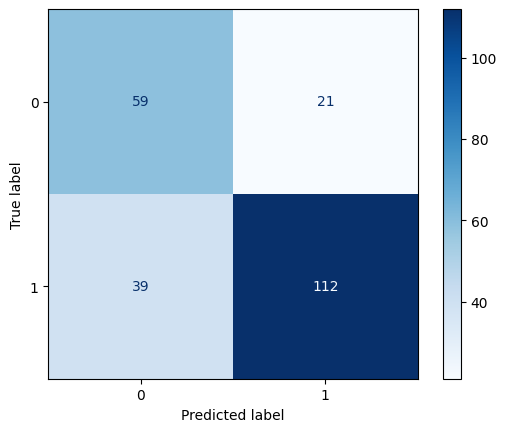

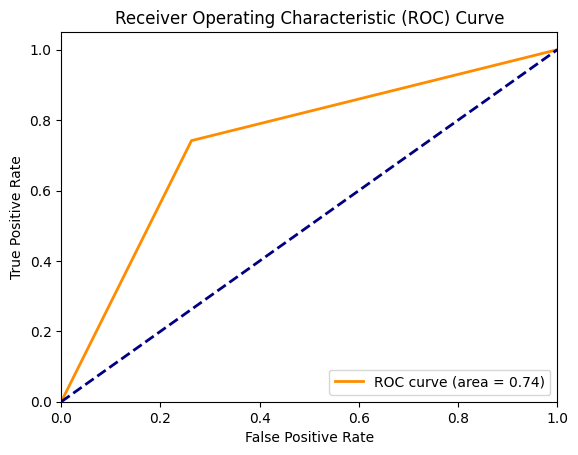

Accuracy score =  0.7402597402597403
Balanced Accuracy Score =  0.7396109271523179


In [17]:
X=ds4.iloc[:,1:-1].values
y=ds4.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 5
[[ go back to the top ]](#Table-of-contents)

In [18]:
ds5 = pd.read_csv('data/ds5.csv')
ds5['Class'] = ds5['Class'].replace({2: 0, 1: 1})
ds5.head()

,V1,V2,V3,V4,Class
0,2,50,12500.0,98,0
1,0,13,3250.0,28,0
2,1,16,4000.0,35,0
3,2,20,5000.0,45,0
4,1,24,6000.0,77,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/150045646.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds5['Class'], sort=True).sort_index()


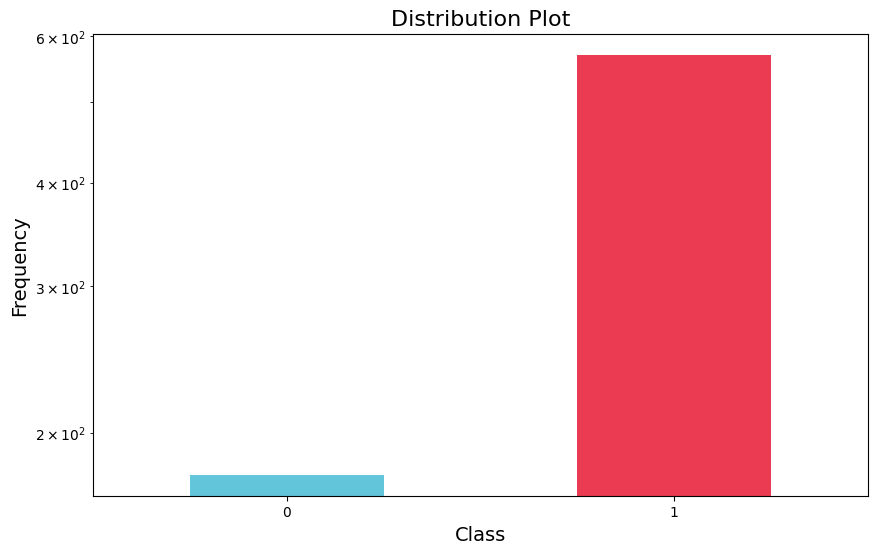

In [19]:
count_classes = pd.value_counts(ds5['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


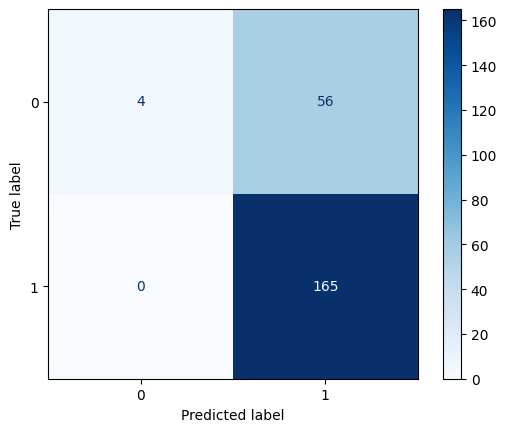

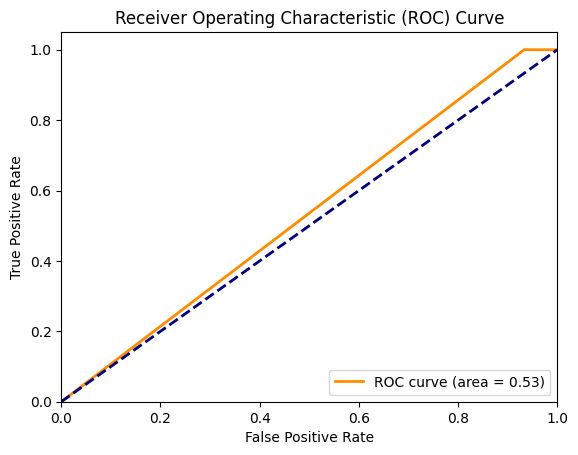

Accuracy score =  0.7511111111111111
Balanced Accuracy Score =  0.5333333333333333
Weighted Random Forest Results:


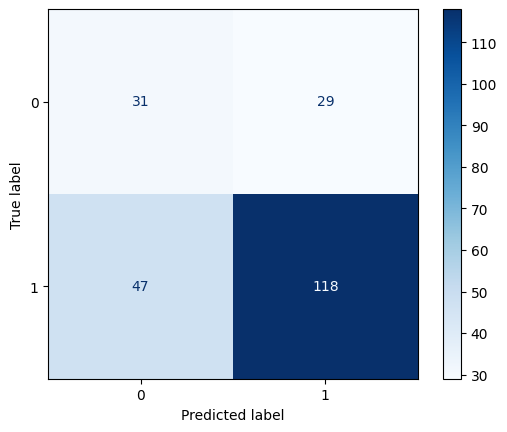

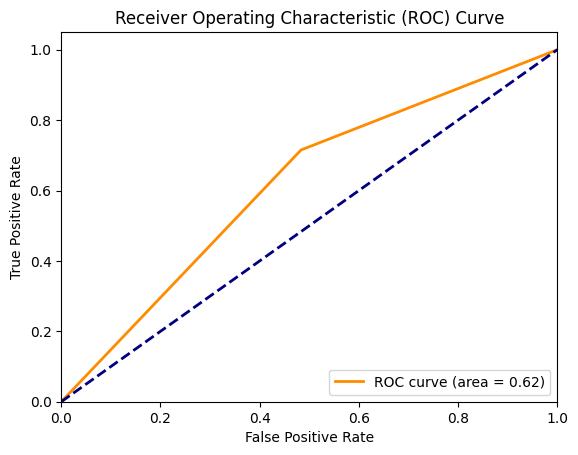

Accuracy score =  0.6622222222222223
Balanced Accuracy Score =  0.615909090909091


In [20]:
X=ds5.iloc[:,1:-1].values
y=ds5.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 6
[[ go back to the top ]](#Table-of-contents)

In [21]:
ds6 = pd.read_csv('data/ds6.csv')
ds6['Class'] = ds6['Class'].replace({'N': 1, 'P': 0})
ds6.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/389119644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds6['Class'] = ds6['Class'].replace({'N': 1, 'P': 0})


,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,Class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,1
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,1
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,1
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,1
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/991334241.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds6['Class'], sort=True).sort_index()


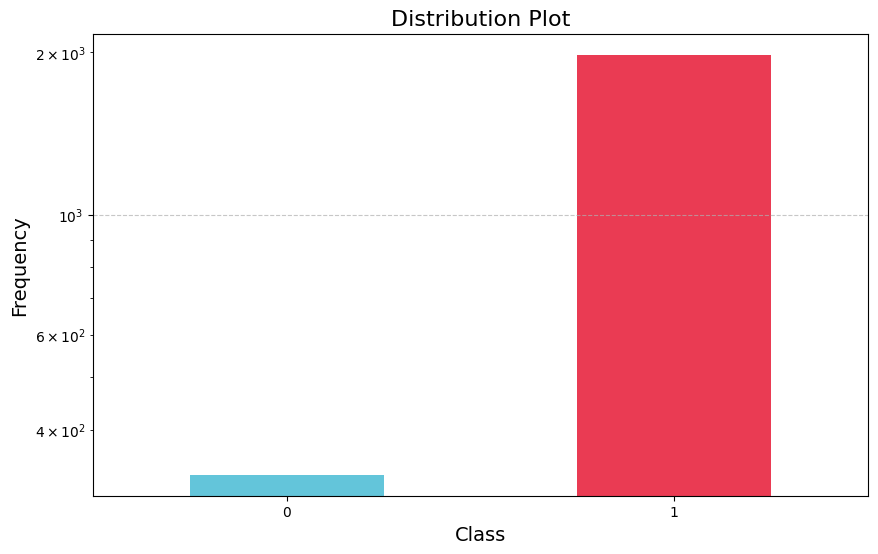

In [22]:
count_classes = pd.value_counts(ds6['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


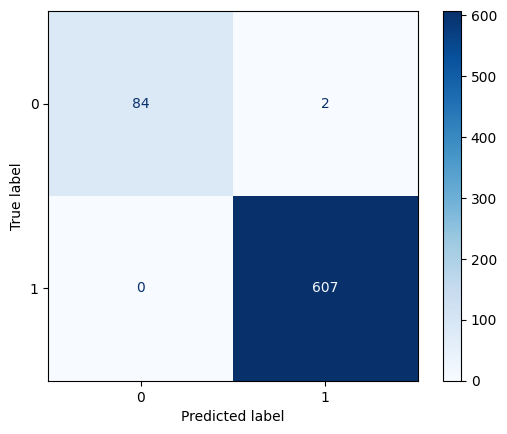

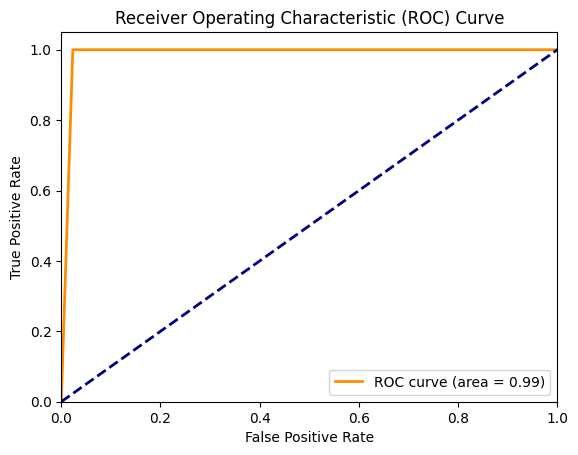

Accuracy score =  0.9971139971139971
Balanced Accuracy Score =  0.9883720930232558
Weighted Random Forest Results:


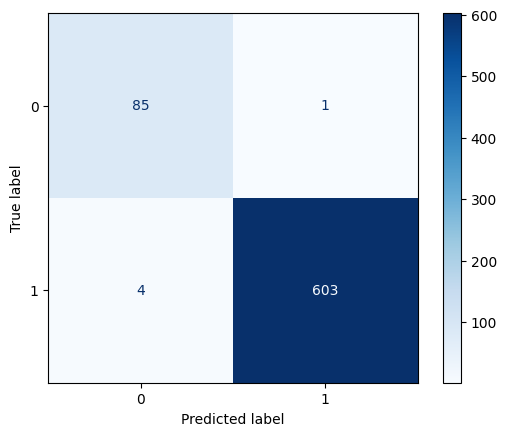

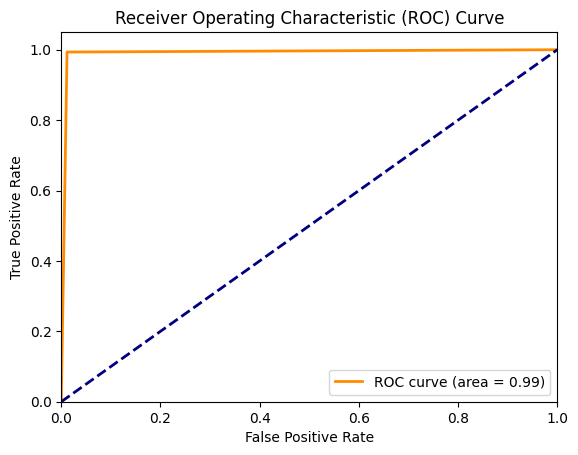

Accuracy score =  0.9927849927849928
Balanced Accuracy Score =  0.9908911535956477


In [23]:
X=ds6.iloc[:,1:-1].values
y=ds6.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 7
[[ go back to the top ]](#Table-of-contents)


In [24]:
ds7 = pd.read_csv('data/ds7.csv')
ds7['Class'] = ds7['Class'].replace({False: 1, True: 0})
ds7.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/1442763208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds7['Class'] = ds7['Class'].replace({False: 1, True: 0})


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Class
0,0,1,1,0,0,0,1,0.33,0,0.0,...,3,0.25,3.0,6.0,3,6,4.0,0.00,3,1
1,1,5,4,0,0,8,3,0.27,4,2.0,...,12,0.23,21.0,36.0,12,13,13.0,0.00,11,1
2,0,1,0,0,0,0,1,0.33,0,0.0,...,2,0.25,2.0,5.0,1,5,4.0,0.00,3,1
3,0,1,0,0,0,0,1,0.33,0,0.0,...,2,0.25,2.0,5.0,2,5,4.0,0.00,3,1
4,5,18,18,0,2,20,10,0.17,10,2.0,...,54,0.15,92.0,177.0,48,25,66.0,3.33,58,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/904786614.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds7['Class'], sort=True).sort_index()


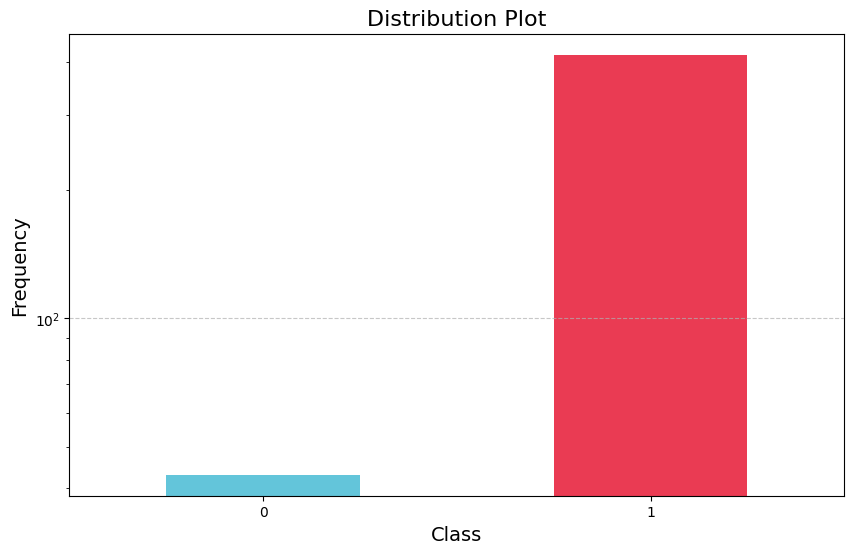

In [25]:
count_classes = pd.value_counts(ds7['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


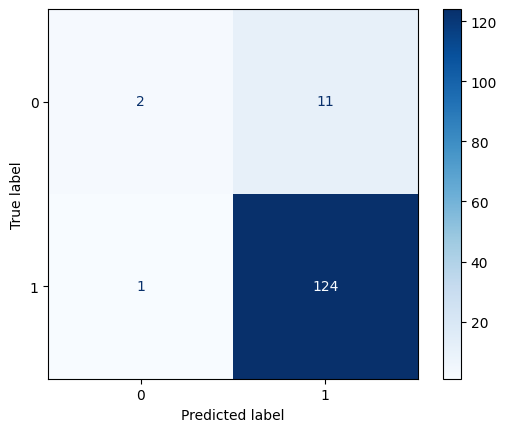

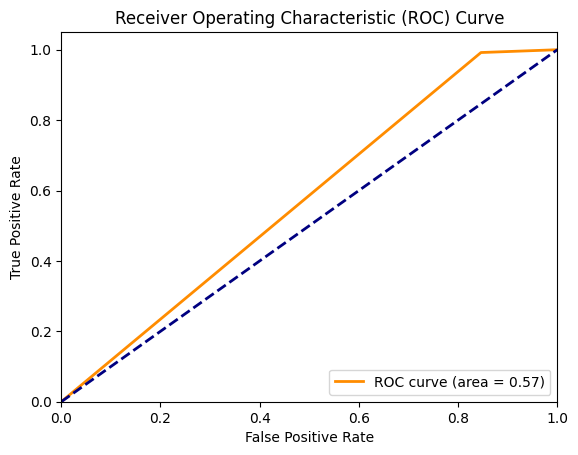

Accuracy score =  0.9130434782608695
Balanced Accuracy Score =  0.5729230769230769
Weighted Random Forest Results:


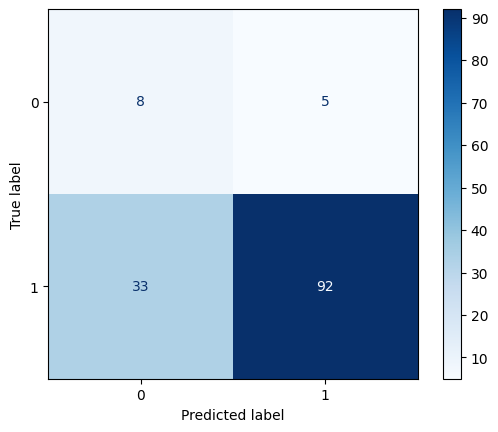

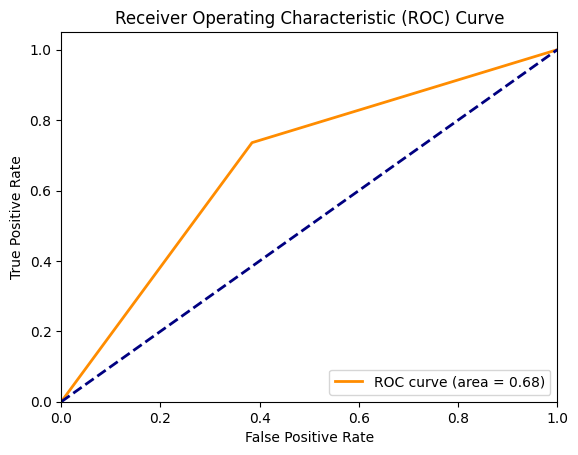

Accuracy score =  0.7246376811594203
Balanced Accuracy Score =  0.6756923076923077


In [26]:
X=ds7.iloc[:,1:-1].values
y=ds7.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 8
[[ go back to the top ]](#Table-of-contents)

In [27]:
ds8 = pd.read_csv('data/ds8.csv')
ds8['Class'] = ds8['Class'].replace({2:0})
ds8.head()

,V1,V2,V3,V4,Class
0,2,50,12500.0,98,0
1,0,13,3250.0,28,0
2,1,16,4000.0,35,0
3,2,20,5000.0,45,0
4,1,24,6000.0,77,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/189569752.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds8['Class'], sort=True).sort_index()


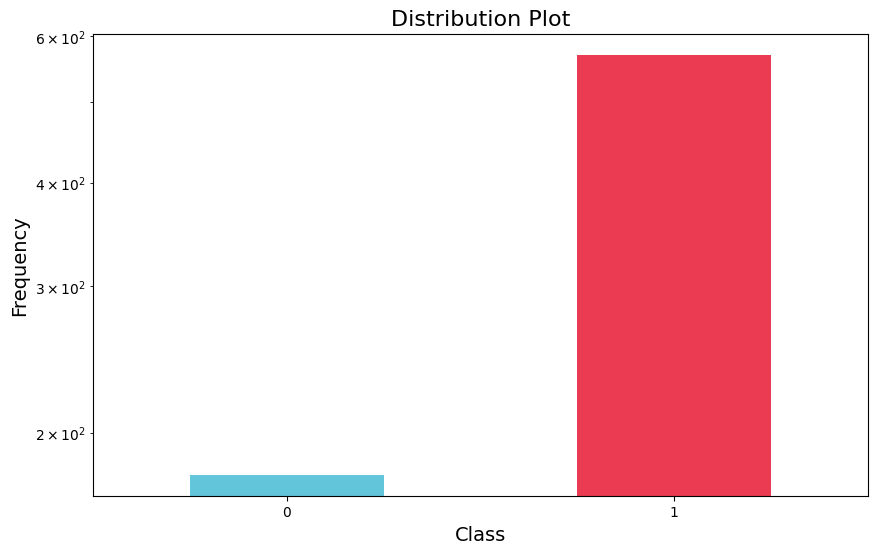

In [28]:
count_classes = pd.value_counts(ds8['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


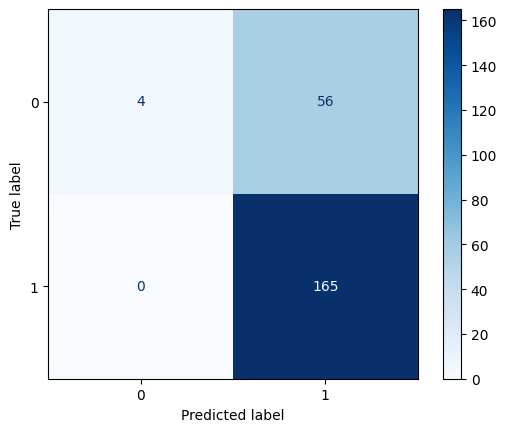

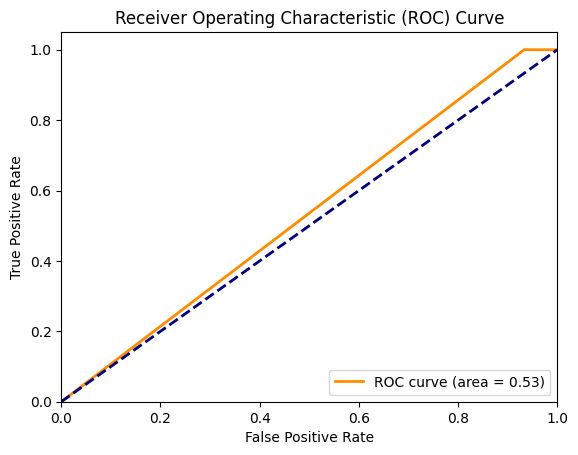

Accuracy score =  0.7511111111111111
Balanced Accuracy Score =  0.5333333333333333
Weighted Random Forest Results:


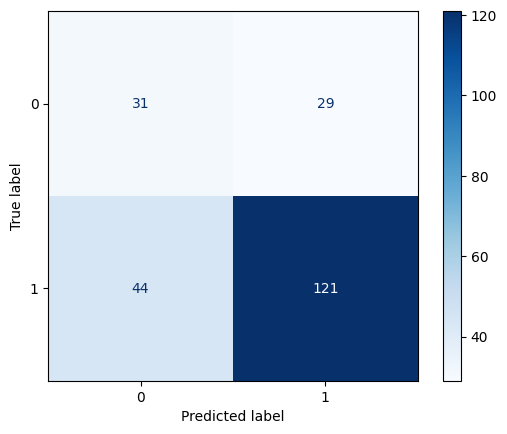

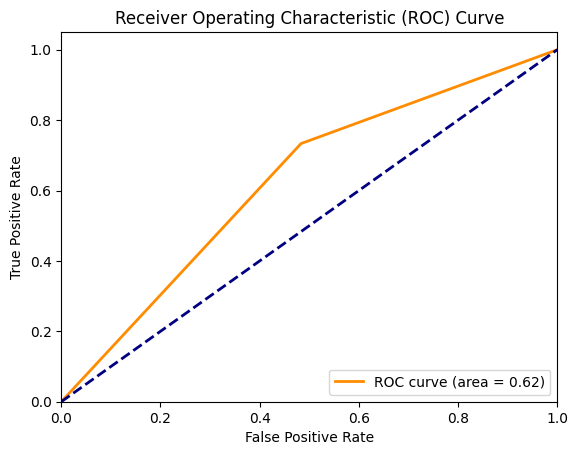

Accuracy score =  0.6755555555555556
Balanced Accuracy Score =  0.625


In [29]:
X=ds8.iloc[:,1:-1].values
y=ds8.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 9
[[ go back to the top ]](#Table-of-contents)

In [30]:
ds9 = pd.read_csv('data/ds9.csv')
ds9['Class'] = ds9['Class'].replace({True: 0, False: 1})
ds9.head()

/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/886061697.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds9['Class'] = ds9['Class'].replace({True: 0, False: 1})


,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2,2,2,1.2,1.2,1.2,1.2,1.4,1
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1,1,1,1.0,1.0,1.0,1.0,1.0,0
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80.0,44,11,31,29.0,66.0,192.0,126.0,17.0,0
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97.0,41,12,24,28.0,75.0,229.0,152.0,38.0,0
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457.0,71,48,49,64.0,397.0,1397.0,942.0,178.0,0


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/3228659666.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds9['Class'], sort=True).sort_index()


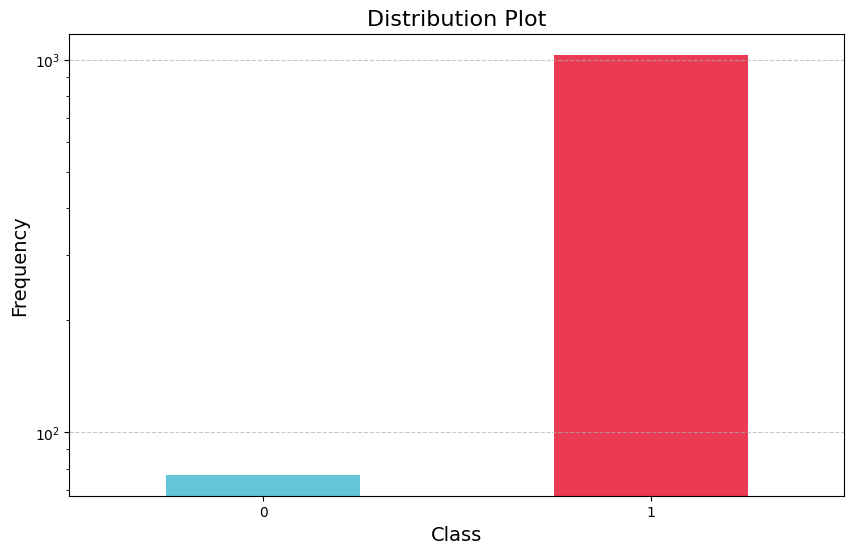

In [31]:
count_classes = pd.value_counts(ds9['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


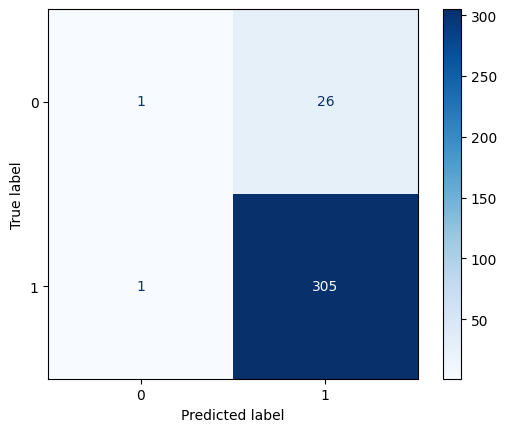

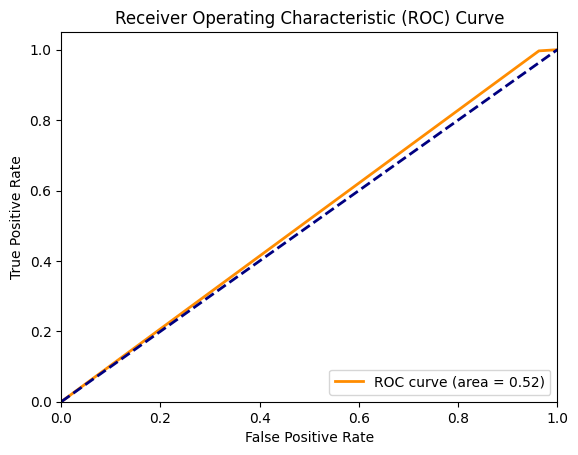

Accuracy score =  0.918918918918919
Balanced Accuracy Score =  0.5168845315904139
Weighted Random Forest Results:


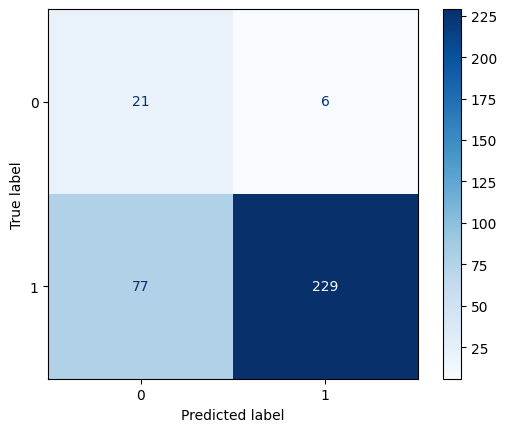

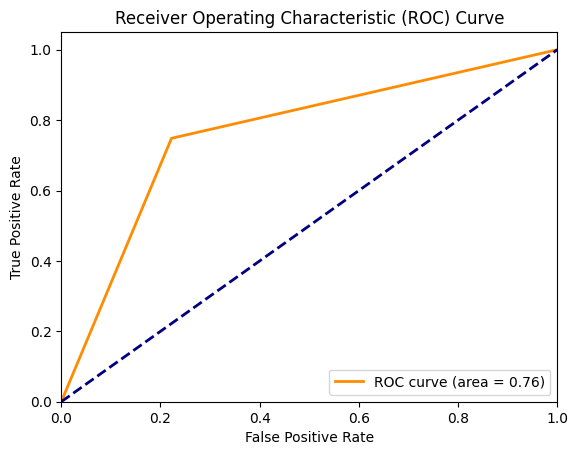

Accuracy score =  0.7507507507507507
Balanced Accuracy Score =  0.7630718954248366


In [32]:
X=ds9.iloc[:,1:-1].values
y=ds9.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

- ### Dataset 10
[[ go back to the top ]](#Table-of-contents)

In [33]:
ds10 = pd.read_csv('data/ds10.csv')
ds10['Class'] = ds10['Class'].replace({'P':  1, 'N': 0})
ds10.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,Class
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


/var/folders/fc/yhkk1bks6bs2m74lnp9spqhw0000gn/T/ipykernel_1387/3097325011.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(ds10['Class'], sort=True).sort_index()


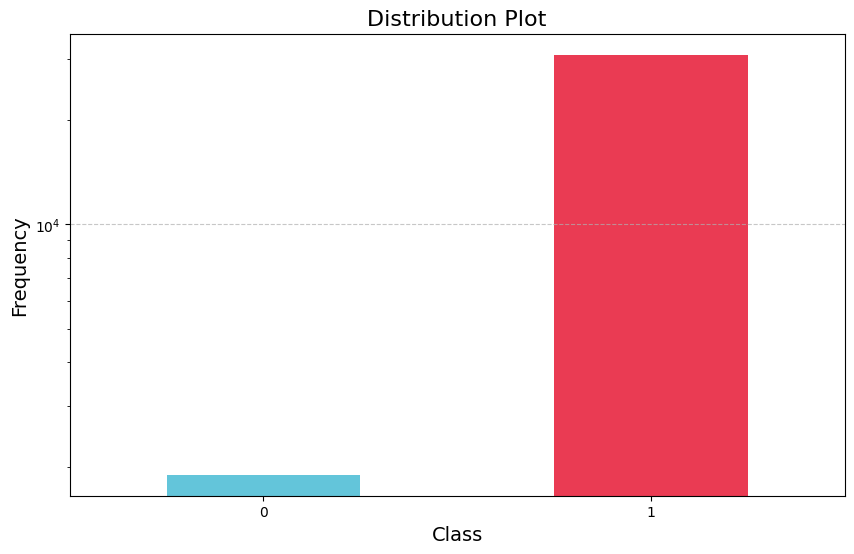

In [34]:
count_classes = pd.value_counts(ds10['Class'], sort=True).sort_index()
plt.figure(figsize=(10, 6))
count_classes.plot(kind='bar', color=['#63c5da', '#ea3b53'])  
plt.title("Distribution Plot", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.yscale("log")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Standard Random Forest Results:


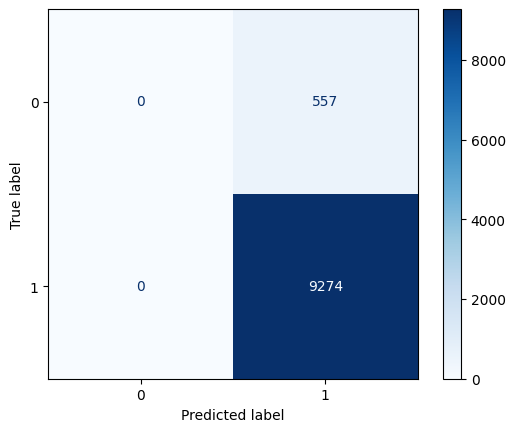

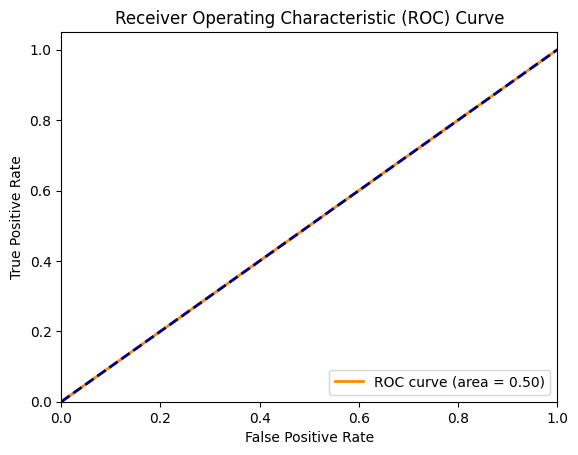

Accuracy score =  0.9433424880480114
Balanced Accuracy Score =  0.5
Weighted Random Forest Results:


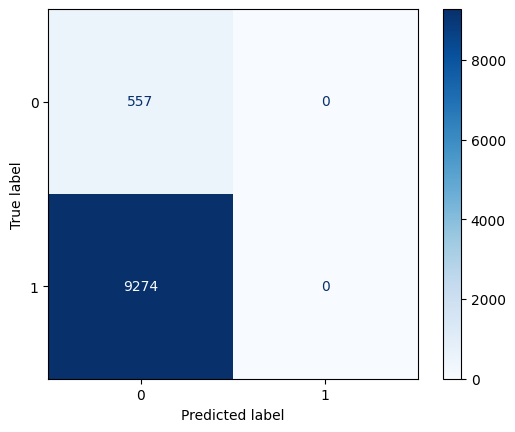

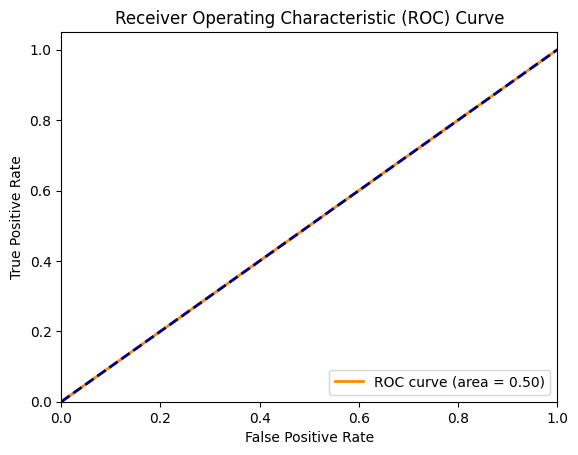

Accuracy score =  0.05665751195198861
Balanced Accuracy Score =  0.5


In [35]:
X=ds10.iloc[:,1:-1].values
y=ds10.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
standard_model = RandomForestClassifierM(n_estimators=100, max_depth=1000)
weighted_model = WeightedRandomForestClassifier(n_estimators=100, max_depth=1000)

print("Standard Random Forest Results:")
ac, balanced_ac = test_algorithm(standard_model, X_train, y_train, X_test, y_test)
accuracy_score_list.append(ac)
balanced_accuracy_score_list.append(balanced_ac)

print("Weighted Random Forest Results:")
wac, wbalanced_ac = test_algorithm(weighted_model, X_train, y_train, X_test, y_test)
weighted_accuracy_score_list.append(wac)
weighted_balanced_accuracy_score_list.append(wbalanced_ac)

----------------------------------------------------------------------------------------------------------------------------------

In [36]:
print(balanced_accuracy_score_list)
print(weighted_balanced_accuracy_score_list)

[0.903633883170036, 0.5493197278911565, 0.5, 0.7447847682119206, 0.5333333333333333, 0.9883720930232558, 0.5729230769230769, 0.5333333333333333, 0.5168845315904139, 0.5]
[0.8953010666005209, 0.7273809523809525, 0.6655405405405406, 0.7396109271523179, 0.615909090909091, 0.9908911535956477, 0.6756923076923077, 0.625, 0.7630718954248366, 0.5]


## Results Analysis and Comparison
[[ go back to the top ]](#Table-of-contents)

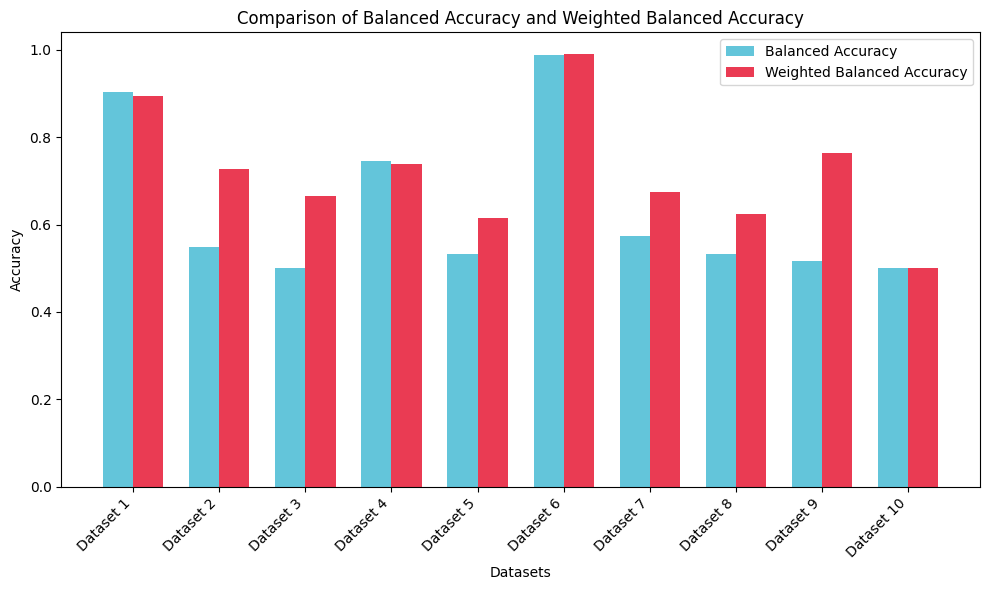

In [37]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5', 'Dataset 6', 'Dataset 7', 'Dataset 8', 'Dataset 9', 'Dataset 10']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(datasets))

bars1 = ax.bar(index, balanced_accuracy_score_list, bar_width, label='Balanced Accuracy', color='#63c5da') # Bars with balanced accuracy values for the standard model
bars2 = ax.bar(index + bar_width, weighted_balanced_accuracy_score_list, bar_width, label='Weighted Balanced Accuracy', color='#ea3b53') # Bars with balanced accuracy values for the weighted model

ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Balanced Accuracy and Weighted Balanced Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(datasets, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
